In [13]:
# data from http://archive.ics.uci.edu/ml/datasets/SUSY#

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support,roc_auc_score)

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

#rcParams['figure.figsize'] = 14, 8

In [2]:
SUSY_data = pd.read_csv('SUSY.csv')

The first column is the class label (1 for signal, 0 for background), followed by the 18 features (8 low-level features then 10 high-level features):: lepton 1 pT, lepton 1 eta, lepton 1 phi, lepton 2 pT, lepton 2 eta, lepton 2 phi, missing energy magnitude, missing energy phi, MET_rel, axial MET, M_R, M_TR_2, R, MT2, S_R, M_Delta_R, dPhi_r_b, cos(theta_r1). For detailed information about each feature see the original paper.

In [3]:
labels = ["class","lep1 pT", "lep1 eta", "lep1 phi", "lep2 pT", "lep2 eta", "lep2 phi", "MEmag", "ME phi", "MET_rel", "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]
SUSY_data.columns = labels

In [4]:
SUSY_data.head()

,class,lep1 pT,lep1 eta,lep1 phi,lep2 pT,lep2 eta,lep2 phi,MEmag,ME phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
1,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
2,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
3,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
4,0.0,0.456398,1.099371,1.512453,0.751772,0.638967,-0.742216,0.322601,1.321054,0.169502,0.359941,0.489256,0.416168,0.754829,0.303750,0.461067,0.345541,0.733242,0.186044


In [5]:
dfSignal = SUSY_data[SUSY_data["class"] == 1]
dfbackg = SUSY_data[SUSY_data["class"] == 0]

dfSignal.shape,dfbackg.shape

((2287827, 19), (2712172, 19))

# Multi-Layer Perceptron method

In [6]:
Xclass = SUSY_data.drop('class',axis=1)
yclass = SUSY_data['class']

In [8]:
#Test and Training
#nb_epoch = 10
#batch_size = 32


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xclass, yclass)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(11,11,11,11,11), learning_rate_init = 0.05)#,max_iter=500
history = mlp.fit(X_train,y_train)

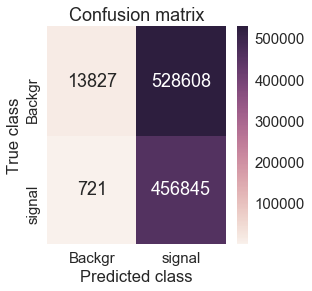

In [31]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
conf_matrix = confusion_matrix(y_test,predictions)


plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,xticklabels=['Backgr','signal'], yticklabels=['Backgr','signal'],fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

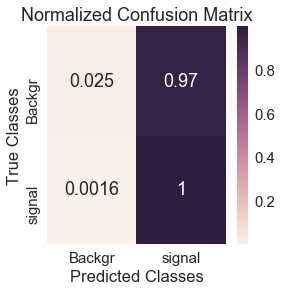

In [32]:
lista = y_test
y_y =pd.DataFrame({'y':lista})
y_test_backgr = y_y.y.value_counts()[0]
y_test_signal = y_y.y.value_counts()[1]
cfn_matrix = confusion_matrix(y_test,predictions)
cfn_norm_matrix = np.array([[1.0 / y_test_backgr,1.0/y_test_backgr],[1.0/y_test_signal,1.0/y_test_signal]])
norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

plt.figure(figsize=(4, 4))
sns.heatmap(norm_cfn_matrix, annot=True,xticklabels=['Backgr','signal'], yticklabels=['Backgr','signal'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [14]:
class_report = print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.78      0.87      0.83    677964
        1.0       0.82      0.72      0.77    572036

avg / total       0.80      0.80      0.80   1250000



In [15]:
probabilities = mlp.predict_proba(X_test)
print(probabilities)

[[0.89385718 0.10614282]
 [0.19589824 0.80410176]
 [0.1820914  0.8179086 ]
 ...
 [0.59954229 0.40045771]
 [0.43484207 0.56515793]
 [0.40464463 0.59535537]]


### K-fold

In [16]:
x = Xclass.loc[:]
y = yclass.loc[:]

cv = StratifiedKFold(n_splits=5,shuffle=True)
i =0
aucs3 = []
for train,test in cv.split(x,y):
    print('{}%'.format(i*20))
    X_train = x.iloc[train]
    X_test = x.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    
    pred = mlp.fit(X_train,y_train).predict(X_test)
    aucs3.append(roc_auc_score(y_test, pred))
    i=i+1

AUC = '{}+-{}'.format(round(np.average(aucs3), 2),round(np.std(aucs3),2))
print('AUC:', AUC )

0%
20%
40%
60%
80%
AUC: 0.73+-0.12


## Increasing the number and size of hidden layers

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xclass, yclass)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [37]:
mlp2 = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50), learning_rate_init = 0.05)#,max_iter=500
history = mlp2.fit(X_train,y_train)

In [38]:
pred2 =  mlp2.predict(X_test)
AUC2 = roc_auc_score(y_test, pred2)
print(AUC2)

0.7936017219471072


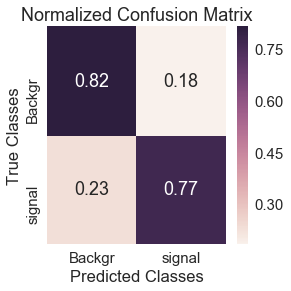

In [39]:
lista = y_test
y_y =pd.DataFrame({'y':lista})
y_test_backgr = y_y.y.value_counts()[0]
y_test_signal = y_y.y.value_counts()[1]
cfn_matrix = confusion_matrix(y_test,pred2)
cfn_norm_matrix = np.array([[1.0 / y_test_backgr,1.0/y_test_backgr],[1.0/y_test_signal,1.0/y_test_signal]])
norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

plt.figure(figsize=(4, 4))
sns.heatmap(norm_cfn_matrix, annot=True,xticklabels=['Backgr','signal'], yticklabels=['Backgr','signal'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [40]:
x = Xclass.loc[:]
y = yclass.loc[:]

cv = StratifiedKFold(n_splits=5,shuffle=True)
i =0
aucs3 = []
for train,test in cv.split(x,y):
    print('{}%'.format(i*20))
    X_train = x.iloc[train]
    X_test = x.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    
    pred2 = mlp2.fit(X_train,y_train).predict(X_test)
    aucs3.append(roc_auc_score(y_test, pred2))
    i=i+1

AUC2 = '{}+-{}'.format(round(np.average(aucs3), 2),round(np.std(aucs3),2))
print('AUC:', AUC2 )

0%
20%
40%
60%
80%
AUC: 0.67+-0.14


## Decreasing the number and size of hidden layers

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xclass, yclass)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [42]:
mlp3 = MLPClassifier(hidden_layer_sizes=(10,10,10), learning_rate_init = 0.05)#,max_iter=500
history = mlp3.fit(X_train,y_train)

In [43]:
pred3 =  mlp3.predict(X_test)
AUC3 = roc_auc_score(y_test, pred3)
print(AUC3)

0.7936540186044742


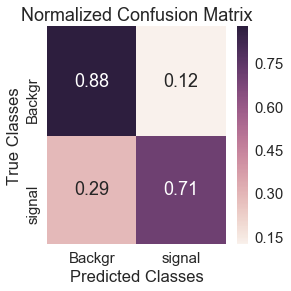

In [44]:
lista = y_test
y_y =pd.DataFrame({'y':lista})
y_test_backgr = y_y.y.value_counts()[0]
y_test_signal = y_y.y.value_counts()[1]
cfn_matrix = confusion_matrix(y_test,pred3)
cfn_norm_matrix = np.array([[1.0 / y_test_backgr,1.0/y_test_backgr],[1.0/y_test_signal,1.0/y_test_signal]])
norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

plt.figure(figsize=(4, 4))
sns.heatmap(norm_cfn_matrix, annot=True,xticklabels=['Backgr','signal'], yticklabels=['Backgr','signal'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [45]:
x = Xclass.loc[:]
y = yclass.loc[:]

cv = StratifiedKFold(n_splits=5,shuffle=True)
i = 0
aucs3 = []
for train,test in cv.split(x,y):
    print('{}%'.format(i*20))
    X_train = x.iloc[train]
    X_test = x.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    
    pred2 = mlp3.fit(X_train,y_train).predict(X_test)
    aucs3.append(roc_auc_score(y_test, pred2))
    i=i+1



0%
20%
40%
60%
80%


In [46]:
AUC3 = '{}+-{}'.format(round(np.average(aucs3), 3),round(np.std(aucs3),3))
print('AUC:', AUC3 )

AUC: 0.792+-0.002


# ROC CURVE

In [73]:

X_train, X_test, y_train, y_test = train_test_split(Xclass, yclass)

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.metrics import roc_curve, auc
from scipy import interp
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = mlp3.predict_proba(X_test)

y_score1 = [y_score[i][1] for i in range(len(X_test))]

fpr1, tpr1, _ = roc_curve(y_test, y_score1)

roc_auc1 = auc(fpr1, tpr1)
roc_auc1

0.8708506982457997

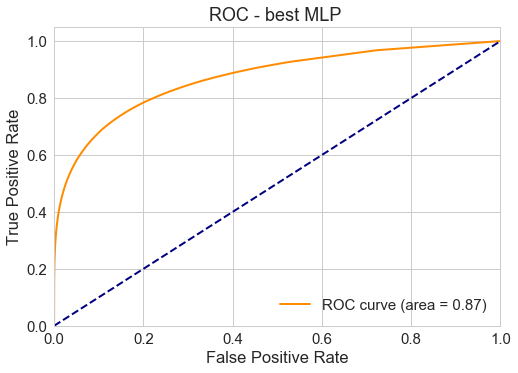

In [74]:
plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - best MLP ')
plt.legend(loc="lower right")
plt.show()